In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/My Drive/Colab Notebooks/CNN/CNN_CIFAR100_Classifier
%pwd
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/CNN/CNN_CIFAR100_Classifier
LICENSE   models/     README.md         results/  src/                 tox.ini
Makefile  notebooks/  requirements.txt  setup.py  test_environment.py


In [5]:
from src.data.make_dataset import load_data
from src.models.predict_model import report, make_prediction
from src.models.visualize import plot_metrics, display_confusion_matrix, plotmodel, visualize_layers, visualize_predictions

In [6]:
(x_train, y_train), (x_test, y_test) , classes = load_data()

[Info] Loading CIFAR10 dataset ...
[Info] Dataset loaded
number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 100)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 100)


In [8]:
model_name = 'mobilenet_1.h5'
logs = 'logs.csv'

##Accuracy and Loss curves

We can see that on the training set the model reches an accuracy about 90% and in testing 70%.

The model's accuracy is increasing for both the training and testing datasets. This is a good sign, as it indicates that the model is learning from the training data and improving its ability to generalize to unseen data.

However, the training accuracy is consistently higher than the testing accuracy. This might indicate lead overfitting. Overfitting means that the model is memorizing the training data too well and is not able to generalize well to new data.


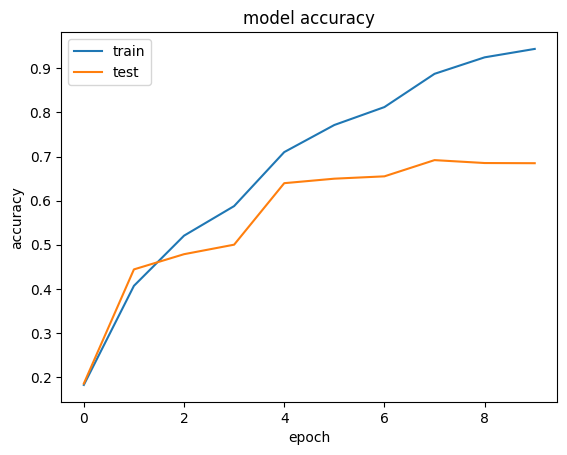

<Figure size 640x480 with 0 Axes>

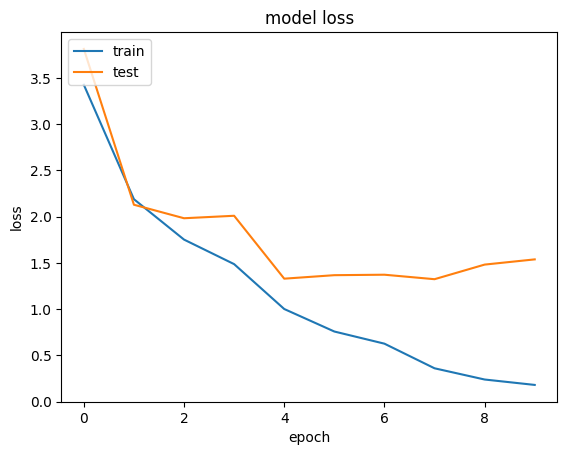

<Figure size 640x480 with 0 Axes>

In [34]:
plot_metrics(logs, model_name)

##Confusion matrix

 We see that the diagonal elements are all non-zero, indicating that the model correctly classified at least some instances for all 100 classes.

 However, there are also non-zero values in the off-diagonal elements, meaning the model made some misclassifications. The misclassifications seem to be spread across all classes, with varying degrees. Some classes have higher misclassification rates than others.

 Even though, the model exibit a good behaviour and is correctly classifying the images about 70% of the time.

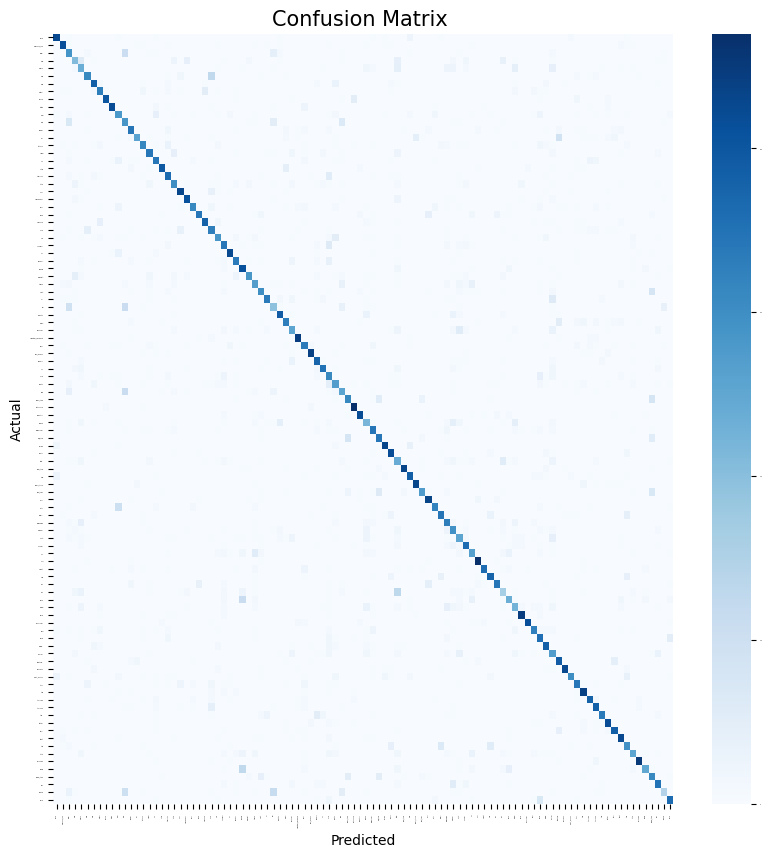

In [25]:
display_confusion_matrix(x_test, y_test, classes, model_name)

#Predictions visualizations

Bellow we will provide some radom images to the network and display the results

313/313 [==============================] - 13s 33ms/step


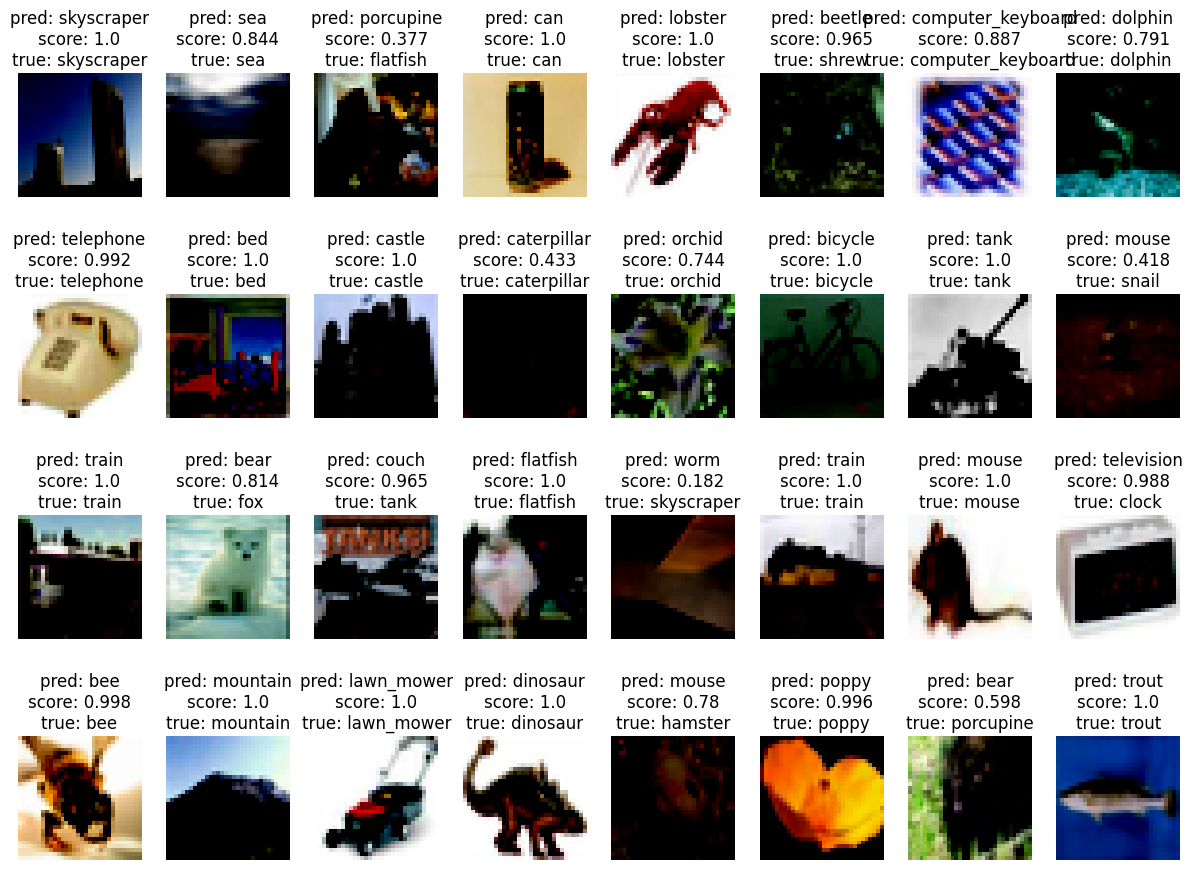

In [5]:
visualize_predictions(y_test, x_test,  classes, model_name)

##Classification report

Achieving an overall accuracy of 68% on the test set indicates that the model correctly classifies 68% of the images in the test set.

The weighted average precision, recall, and F1-scores are higher than the corresponding macro average scores. This indicates that the model is performing better on the majority classes than the minority classes.
The precision, recall, and F1-scores for all classes are above 60%, which suggests that the model is making more correct predictions than incorrect predictions for all classes.

This demonstrate that the model has learned to distinguish between the different classes reasonably well. However, it can be futher improved, and it would be worthwhile to further analyze the model's performance to identify any areas where it can be refined.

In [18]:
report(x_test, y_test, classes, model_name)

313/313 [==============================] - 11s 34ms/step
              precision  recall  f1-score     support
0              0.841584  0.8500  0.845771    100.0000
1              0.873684  0.8300  0.851282    100.0000
2              0.414286  0.5800  0.483333    100.0000
3              0.500000  0.4200  0.456522    100.0000
4              0.398305  0.4700  0.431193    100.0000
...                 ...     ...       ...         ...
98             0.707317  0.2900  0.411348    100.0000
99             0.750000  0.7200  0.734694    100.0000
accuracy       0.682200  0.6822  0.682200      0.6822
macro avg      0.700231  0.6822  0.685180  10000.0000
weighted avg   0.700231  0.6822  0.685180  10000.0000

[103 rows x 4 columns]


In [27]:
make_prediction(x_test, y_test, classes, model_name)

313/313 [==============================] - 11s 33ms/step
    Real Real Class  Prediction Predict Class  Probability
0   49.0   mountain        71.0           sea     0.267939
1   33.0     forest        33.0        forest     0.946752
2   72.0       seal        72.0          seal     0.588946
3   51.0   mushroom        51.0      mushroom     0.999999
4   71.0        sea        71.0           sea     0.553082
5   92.0      tulip         6.0           bee     0.572785
6   15.0      camel        34.0           fox     0.233334
7   14.0  butterfly         7.0        beetle     0.299115
8   23.0      cloud        71.0           sea     0.702313
9    0.0      apple         0.0         apple     0.989479
10  71.0        sea        12.0        bridge     0.398015
11  75.0      skunk        75.0         skunk     1.000000
12  81.0  streetcar        90.0         train     0.977714
13  69.0     rocket        69.0        rocket     0.999999
14  40.0       lamp        40.0          lamp     1.000000

#Conclusion


Using the LeNet-5 model for the CIFAR-10 dataset proved to be successful, as it initially achieved a promising accuracy of 55%. However, further improvements were made by applying regularization techniques, data augmentation, and a variable learning rate, leading to a significant boost in accuracy to 72%. This demonstrates the effectiveness of these strategies in addressing the issue of overfitting and enhancing the model's generalization ability.

The initial accuracy of 55% indicates that the LeNet-5 model had the potential to capture the underlying patterns and features in the CIFAR-10 dataset. However, the overfitting issue prevented the model from fully utilizing this potential and resulted in suboptimal performance.

By applying regularization techniques, the complexity of the model was controlled, reducing its tendency to memorize the training data and improving its ability to generalize to unseen data. Data augmentation, on the other hand, increased the diversity of the training data, allowing the model to learn more robust and generalizable features. The variable learning rate approach further refined the model's optimization process, enabling it to adjust its learning behavior dynamically and avoid getting stuck in local minima.

The combination of these techniques effectively addressed the overfitting issue, resulting in a significant improvement in accuracy from 55% to 72%.

However, the cost of this performance was an increased trainign time. Initially it tok about 10 minutes to train the model but the second case took about 2 hours. This is mainly due to the ```ImageDataGenerator``` class used for the data augmentation.

To improve the performance, we can also consider to select another model architecture that suit better for this task or use hyperparameter optimization to find the right parameters that minimizes loss and maximises accuracy.


